In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from random import randint
from sklearn.preprocessing import StandardScaler

# Write the linear regression hypothesis function in vector form


In [2]:
def linear_regresion(input_value, w0=0, w1=0):
    return w0 + w1 * input_value

Using the linear regression hypothesis function in vector form

In [3]:
input_data = np.array([2, 3, 4, 5])

output_data = input_data * 3 + 2

h_res = linear_regresion(input_data)
h_res

array([0, 0, 0, 0])

# Create a function to calculate the cost function in vector form


In [4]:
def mse(predicted_results, true_results):
    return 1 / (2 * len(predicted_results)) * np.sum((predicted_results - true_results) ** 2)

# Perform a single gradient descent step


In [19]:
def gradient_descent(input_data_, output_data_, iter=1000, lr=0.1, stopping_value=0.01):
    weight_0 = 0
    weight_1 = 0
    n = len(input_data_)
    last_mse_result = None

    for _ in range(iter):
        linear_regresion_result = linear_regresion(input_data_, weight_0, weight_1)
        mse_result = mse(linear_regresion_result, output_data_)

        if last_mse_result and abs(mse_result - last_mse_result) <= stopping_value:
            break

        last_mse_result = mse_result

        intercept_derivative = -(1/n) * np.sum(input_data_ * (output_data_ - linear_regresion_result))
        slope_derivative = -(1/n) * np.sum(output_data_ - linear_regresion_result)

        weight_0 -= slope_derivative * lr
        weight_1 -= intercept_derivative * lr

    return weight_0, weight_1

Finding weights

In [20]:
weight_0, weight_1 = gradient_descent(input_data, output_data)

Comparing predicted results with actual

In [21]:
predicted_values = linear_regresion(input_data, weight_0, weight_1).round()

print('Predicted Values:', predicted_values)
print('Actual Values:', output_data)

Predicted Values: [ 8. 11. 14. 17.]
Actual Values: [ 8 11 14 17]


# Find the best weighting parameters for the dataset using functions you wrote, predicting house price based on square footage, number of bathrooms, and number of bedrooms

In [22]:
import pandas as pd

df = pd.read_csv('Housing.csv').sample(frac=1).reset_index(drop=True)

h_input_data = df[['area', 'bedrooms', 'bathrooms']].values
h_input_data = StandardScaler().fit(h_input_data).transform(h_input_data)

h_output_data = df[['price']].values.reshape(-1)


In [23]:
def multiple_linear_regresion(input_data_, weights):
    return weights[0] + np.dot(input_data_, weights[1:])

In [24]:
def gradient_descent_multiple(input_data_, output_data_, iter=1000, lr=0.1, stopping_value=0.01):
    weights = np.random.random(input_data_.shape[1] + 1)
    n = len(input_data_)
    last_mse_result = None

    for _ in range(iter):
        multiple_linear_regresion_result = multiple_linear_regresion(input_data_, weights)
        mse_result = mse(multiple_linear_regresion_result, output_data_)

        if last_mse_result and (abs(mse_result - last_mse_result) <= stopping_value):
            break

        last_mse_result = mse_result

        weights[0] -= lr * (1/n) * np.sum(multiple_linear_regresion_result - output_data_)

        random_index = randint(0, len(weights[1:]) - 1)
        last_weights = (1/n) * np.sum((multiple_linear_regresion_result - output_data_) * input_data_[:, random_index])
        weights[random_index + 1] -= lr * last_weights

    return weights

gradient_descent_multiple_result = gradient_descent_multiple(h_input_data, h_output_data)
model_result = multiple_linear_regresion(h_input_data, gradient_descent_multiple_result)

In [25]:
model = LinearRegression()
model.fit(h_input_data, h_output_data)
model_result_lib = model.predict(h_input_data)

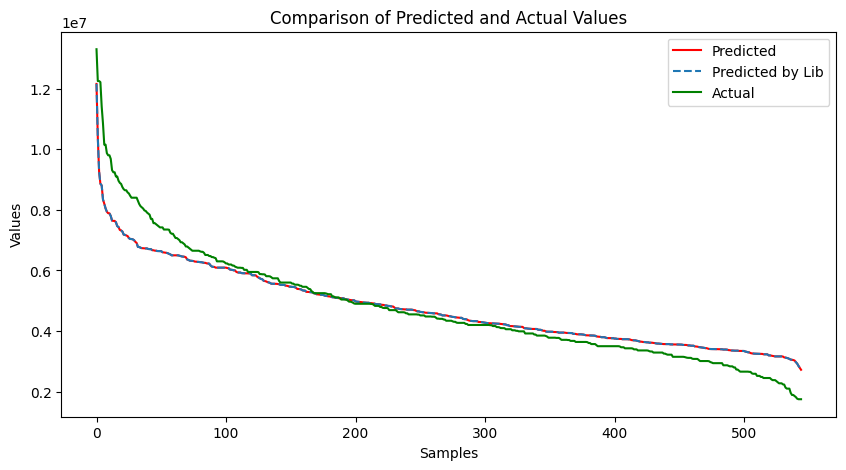

In [29]:
import matplotlib.pyplot as plt

predicted_values = model_result

actual_values = h_output_data

plt.figure(figsize=(10, 5))

plt.plot(np.sort(predicted_values)[::-1], label='Predicted', color='r')
plt.plot(np.sort(model_result_lib)[::-1], label='Predicted by Lib', linestyle='--')
plt.plot(np.sort(actual_values)[::-1], label='Actual', color='g')

# plt.plot(predicted_values, label='Predicted')
# plt.plot(model_result_lib, label='Predicted by Lib', linestyle='--')
# plt.plot(actual_values, label='Actual')

plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

# Find the same parameters using analytical solution.

In [ ]:
h_input_data_with_ones = np.hstack([np.ones((h_input_data.shape[0], 1)), h_input_data])
theta = np.linalg.inv(h_input_data_with_ones.T @ h_input_data_with_ones) @ h_input_data_with_ones.T @ h_output_data

array([4766729.24770642,  821214.14349519,  299983.57107963,
        695808.52272537])

# To verify the predicted values, use LinearRegression from the scikit-learn library and compare the results.

In [ ]:
weights_by_lib = list(model.coef_)
weights_by_lib.append(model.intercept_)

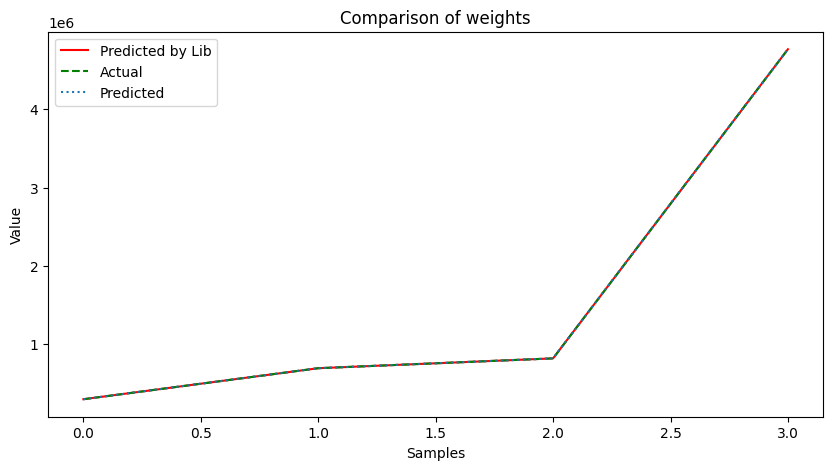

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(sorted(weights_by_lib), label='Predicted by Lib', color='r')
plt.plot(np.sort(theta), label='Actual', color='g', linestyle='--')
plt.plot(np.sort(gradient_descent_multiple_result), label='Predicted', linestyle='dotted')

plt.xlabel('Samples')
plt.ylabel('Value')
plt.title('Comparison of weights')
plt.legend()
plt.show()